## steps
* Business understanding.
* Data understanding.
* Data preparation.
* Modeling.
* Evaluation.
* Deployment.

## BUSINESS UNDERSTANDING

Pneumonia is a serious lung infection that can affect people of all ages, but it is especially dangerous for the elderly, young children, and those with weakened immune systems. The traditional method for diagnosing pneumonia is through a physical examination and laboratory tests, but these methods are time-consuming and frequently require multiple visits to the doctor. This project aims to solve this real-world problem by developing a model that can accurately classify whether a patient has pneumonia based on a chest x-ray image.

The stakeholders for this project are healthcare professionals and patients who require accurate and timely diagnoses to facilitate proper treatment. Healthcare professionals, such as radiologists, ophthalmologists, and other specialists, could use the deep learning model developed through this project to assist in the diagnosis of various medical conditions based on medical images. Patients would benefit from accurate diagnoses and appropriate treatments, leading to improved health outcomes.

Stakeholders in this application of deep learning include healthcare professionals, patients, hospitals and medical centers, medical device manufacturers, and insurance companies. Healthcare professionals can use the deep learning model to assist them in identifying pneumonia cases in medical imaging, leading to more accurate diagnoses and treatment decisions. Patients can benefit from accurate and timely diagnoses and treatments resulting from the use of deep learning in medical imaging. Hospitals and medical centers can use the deep learning model as a tool to assist in the diagnosis and treatment of various medical conditions, leading to better patient outcomes and more efficient use of medical resources. Medical device manufacturers can incorporate deep learning models into their products to provide more accurate and efficient diagnosis of medical conditions. Insurance companies can benefit from more accurate diagnoses and treatments resulting from the use of deep learning in medical imaging, leading to cost savings and improved health outcomes for their customers.

The project's value lies in its potential to improve medical diagnosis accuracy and treatment outcomes. By accurately classifying medical images, medical professionals can make more informed decisions regarding patient care. Additionally, this project has the potential to enhance the efficiency of medical diagnosis and reduce the need for invasive procedures, such as biopsies. Image classification with deep learning can also be used to identify pneumonia cases in medical imaging such as chest X-rays, which can be useful in assisting healthcare professionals to make accurate diagnoses and treatment decisions.

In summary, this project aims to develop a deep learning model for medical image classification to assist in the accurate and timely diagnosis of medical conditions using Chest X-Ray images. The project's stakeholders include healthcare professionals, patients, hospitals and medical centers, medical device manufacturers, and insurance companies. The project's value lies in its potential to improve medical diagnosis accuracy, treatment outcomes, and the efficiency of medical diagnosis, ultimately leading to better patient outcomes and lower healthcare costs.

## Technical Objectives
1. Build a deep learning model that can classify whether a given patient has pneumonia based on a chest x-ray image.
2. Optimize the model architecture and hyperparameters to achieve the highest possible accuracy on the validation set.
3. Use data augmentation techniques such as rotation, scaling, and flipping to increase the size of the training dataset and improve the model's ability to generalize.
3. Experiment with different optimization algorithms, learning rates, and batch sizes to improve the speed and stability of model training.
4. Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1 score.

## Business Objectives
1. Provide pediatricians with a tool that can quickly and accurately diagnose pneumonia in children, potentially reducing the number of unnecessary hospital visits and improving patient outcomes.
2. Increase the accessibility of pneumonia diagnosis in low-resource settings where trained medical professionals may not be readily available.
3. Potentially reduce healthcare costs by allowing for earlier diagnosis and treatment of pneumonia in pediatric patients.
4. Contribute to the development of a larger dataset for pneumonia diagnosis that can be used for further research and model development.
5. Develop a model that can be easily integrated into existing hospital or clinic workflows, allowing for streamlined and efficient diagnosis.

## Related Work
There has been a significant amount of related work on using deep learning models for pneumonia diagnosis from chest x-ray images. Here are a few examples:

1. Wang et al. (2017) developed a deep learning model based on the Inception architecture to diagnose pneumonia from chest x-ray images. Their model achieved an area under the receiver operating characteristic curve (AUC) of 0.92 on a test set of 279 images, outperforming several other models.
2. Rajpurkar et al. (2017) released a large dataset of chest x-ray images labeled with various pathologies, including pneumonia. They also developed a deep learning model based on the CheXNet architecture that achieved state-of-the-art performance on the task of pneumonia detection.
3. Wang et al. (2018) developed a deep learning model based on the DenseNet architecture that could classify chest x-ray images into various pathologies, including pneumonia. Their model achieved an AUC of 0.887 on a test set of 420 images, outperforming several other models.
4. Chouhan et al. (2020) developed a deep learning model based on the EfficientNet architecture to diagnose pneumonia from chest x-ray images. Their model achieved an accuracy of 95.8% on a test set of 234 images, outperforming several other models.

These studies demonstrate the effectiveness of deep learning models for pneumonia diagnosis from chest x-ray images, as well as the potential for further improvement in accuracy and performance. They also highlight the importance of having access to large and diverse datasets for model training and evaluation.

## DATA UNDERSTANDING

The data source for this project is  Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images”, Mendeley Data, V3.

The dataset contains 5,852 Chest X-Ray images from 2,839 patients, with 1,573 images labeled as "normal" and 4,273 images labeled as "pneumonia".[Dataset](https://data.mendeley.com/datasets/rscbjbr9sj/3)

The data is suitable for the project because it contains labeled medical images that can be used to train a deep learning model to accurately classify medical conditions. Medical imaging is an important tool for diagnosing and treating diseases, and accurate and timely diagnoses are critical for improving patient outcomes.

Descriptive statistics for the features used in the analysis are not applicable in this case since the images are not numerical data. Instead, image pre-processing techniques are applied to transform the images into numerical data that can be used to train a deep learning model.


##  Dataset Limitation
* Due to the fact that the images were obtained from a particular hospital and may not be applicable to other populations, one limitation of the dataset is that it might not be representative of all Chest X-Ray images.
* Furthermore, because there are fewer pneumonia cases than normal cases, the dataset may be skewed. This could impair the model's ability to accurately classify pneumonia cases.
* Another limitation is that the dataset does not include any information about the patients' demographics or medical histories, which could be useful in predicting pneumonia.

# Data Description
* import
* load data
* visualize normal and pneumonia

## Importing Libraries

In [1]:
# Import the necessary libraries
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


## Loading  Image Data

The code defines a function called load_images which loads and preprocesses the images from the train and test folders. The function reads the images, converts them to grayscale, resizes them to a fixed size of 256x256 pixels, and normalizes the pixel values. The images are then stored as numpy arrays along with their corresponding labels. The code then calls the load_images function on the train and test folders to load the data. Finally, the code shows some sample images from the training set using Matplotlib. The images are displayed with their corresponding labels of 'NORMAL' or 'PNEUMONIA'.

In [8]:
%%tme
c = 2*2
c

UsageError: Cell magic `%%tme` not found.


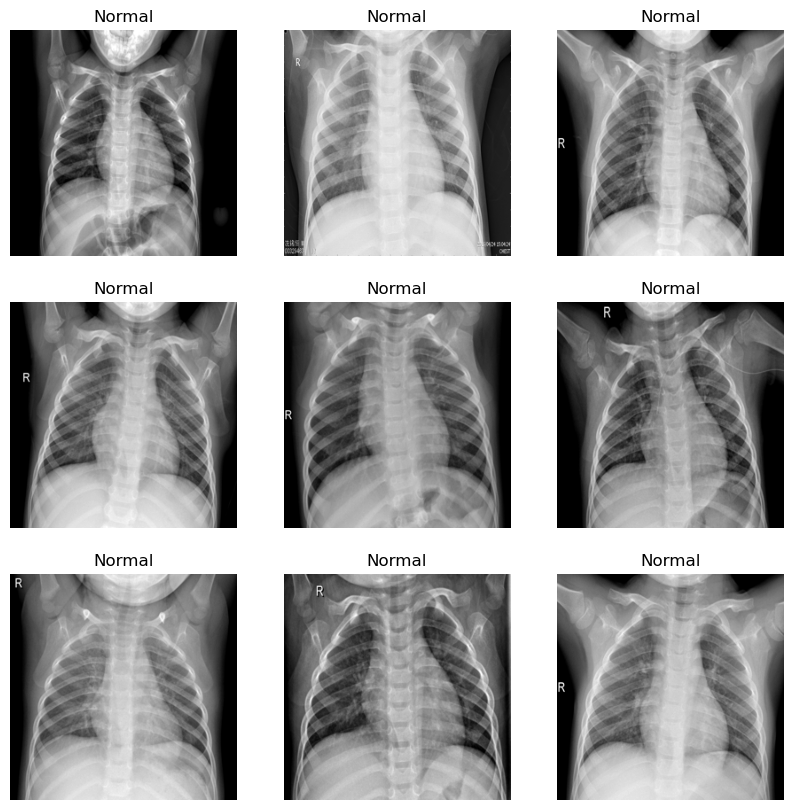

In [3]:

# Define paths to the train and test folders
train_folder = '/home/munyao/Desktop/deku/data/train' 
test_folder = '/home/munyao/Desktop/deku/data/test' 

# Define a function to load and preprocess the images
def load_images(folder):
    images = []
    labels = []
    for label in ['NORMAL', 'PNEUMONIA']:
        for image_path in glob.glob(os.path.join(folder, label, '*.jpeg')):
            with Image.open(image_path) as img:
                img = img.convert('L') # convert to grayscale
                img = img.resize((256, 256)) # resize the image
                img = np.array(img) / 255.0 # normalize the pixel values
                images.append(img)
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the train and test images
train_images, train_labels = load_images(train_folder)
test_images, test_labels = load_images(test_folder)

# Show some sample images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    if train_labels[i] == 'NORMAL':
        ax.set_title('Normal')
    else:
        ax.set_title('Pneumonia')
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')
    if i==8:
        break

plt.show()
